In [1]:
from build_df_from_json import build_combined_df

df = build_combined_df()
df

,umw,url,tytul,tresc,att_text,att_link,att_list_len,data_pub,data_mod,view_cnt,sub_tytul,public_name
0,umw_lodzkiego,https://bip.lodzkie.pl/ogloszenia/komunikaty/i...,Decyzja Marszałka Województwa Łódzkiego z dnia...,Decyzja Marszałka Województwa Łódzkiego z dnia...,[ŚRIII.7222.59.2023.MS DECYZJA.pdf],[https://bip.lodzkie.pl/ogloszenia/komunikaty/...,1.0,2023-06-29 00:00:00,NaT,42.0,NaN,NaN
1,umw_lodzkiego,https://bip.lodzkie.pl/ogloszenia/komunikaty/i...,Zakończenie oceny formalnej projektu „Budowa i...,Projekt „Budowa instalacji fotowoltaicznej na ...,None,None,0.0,2023-06-28 00:00:00,NaT,37.0,NaN,NaN
2,umw_lodzkiego,https://bip.lodzkie.pl/ogloszenia/komunikaty/i...,Zakończenie oceny formalnej projektu „Rozwój k...,Projekt „Rozwój kultury w Gminie Koluszki” zło...,None,None,0.0,2023-06-28 00:00:00,NaT,30.0,NaN,NaN
3,umw_lodzkiego,https://bip.lodzkie.pl/ogloszenia/komunikaty/i...,Postanowienie dotyczące decyzji Marszałka Woje...,,[GKIII.7440.8.2022.EK.AM - postanowienie + wyk...,[https://bip.lodzkie.pl/ogloszenia/komunikaty/...,1.0,2023-06-27 00:00:00,NaT,65.0,NaN,NaN
4,umw_lodzkiego,https://bip.lodzkie.pl/ogloszenia/komunikaty/i...,Zakończenie oceny merytorycznej projektu „Budo...,Projekt „Budowa i modernizacja oświetlenia pub...,None,None,0.0,2023-06-27 00:00:00,NaT,34.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2009,umw_wielkopolskiego,https://bip.umww.pl/292---k_332---k_287---k_19...,"Uprawnienia właścicieli, użytkowników wieczyst...",I. Rodzaje uprawnień oraz tryb i termin dochod...,NaN,NaN,NaN,2016-04-18 09:22:42,NaT,NaN,NaN,NaN
2010,umw_wielkopolskiego,https://bip.umww.pl/292---k_332---k_287---k_18...,Ogłoszenie naboru ofert na wykonanie przez upr...,Uchwała nr 994/15 Zarządu Województwa Wielkopo...,NaN,NaN,NaN,2015-09-08 07:52:13,NaT,NaN,NaN,NaN
2011,umw_wielkopolskiego,https://bip.umww.pl/292---k_332---k_287---k_18...,Zapytanie ofertowe na realizację opracowania p...,Zapytanie ofertowe na realizację opracowania p...,NaN,NaN,NaN,2015-07-24 08:12:46,NaT,NaN,NaN,NaN
2012,umw_wielkopolskiego,https://bip.umww.pl/292---k_332---k_287---k_18...,Plan Zrównoważonego Rozwoju Publicznego Transp...,Aktualizacja Planu Zrównoważonego Rozwoju Publ...,NaN,NaN,NaN,2015-02-18 08:13:31,2020-12-03 13:27:07,NaN,NaN,NaN


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
liczba_obiektow = df.groupby(['umw', 'data_pub']).size().reset_index(name='liczba_obiektow')
liczba_obiektow

,umw,data_pub,liczba_obiektow
0,umw_lodzkiego,2020-10-30 00:00:00,2
1,umw_lodzkiego,2020-11-02 00:00:00,3
2,umw_lodzkiego,2020-11-09 00:00:00,1
3,umw_lodzkiego,2020-11-10 00:00:00,2
4,umw_lodzkiego,2020-11-16 00:00:00,1
...,...,...,...
1225,umw_wielkopolskiego,2022-12-15 14:01:11,1
1226,umw_wielkopolskiego,2022-12-22 16:17:33,1
1227,umw_wielkopolskiego,2022-12-27 12:56:06,1
1228,umw_wielkopolskiego,2022-12-27 13:21:40,1


In [4]:
liczba_obiektow['miesiac_rok'] = liczba_obiektow['data_pub'].dt.to_period('M')
# liczba_obiektow
suma_dla_miesiaca_i_roku = liczba_obiektow.groupby(['miesiac_rok', 'umw'])['liczba_obiektow'].sum().reset_index()
suma_dla_miesiaca_i_roku

,miesiac_rok,umw,liczba_obiektow
0,2010-06,umw_lubelskiego,1
1,2010-07,umw_lubelskiego,1
2,2011-06,umw_lubelskiego,1
3,2012-06,umw_lubelskiego,1
4,2012-09,umw_lubelskiego,1
...,...,...,...
241,2023-06,umw_lubelskiego,5
242,2023-06,umw_mazowieckiego,16
243,2023-06,umw_podlaskiego,300
244,2023-07,umw_mazowieckiego,2


In [5]:
lubelskie_suma = suma_dla_miesiaca_i_roku.loc[suma_dla_miesiaca_i_roku['umw'] == 'umw_lubelskiego']

In [6]:
print(suma_dla_miesiaca_i_roku.umw.unique().tolist())

['umw_lubelskiego', 'umw_wielkopolskiego', 'umw_lodzkiego', 'umw_mazowieckiego', 'umw_podlaskiego']


In [7]:
def gen_column_plot(nazwa_umw):
    
    plt.figure(figsize=(30, 6))

    ax = sns.barplot(x='miesiac_rok', y='liczba_obiektow', data=suma_dla_miesiaca_i_roku.loc[suma_dla_miesiaca_i_roku['umw'] == nazwa_umw], palette='viridis')

    plt.xticks(rotation=45, ha='right')

    plt.title(f'Liczba komunikatów opublikowanych w BIP {nazwa_umw} w danym miesiącu')
    plt.xlabel('Miesiąc i rok')
    plt.ylabel('Suma liczby komunikatow w miesiącu')

    # Wyświetlamy wykres
    plt.tight_layout()
    plt.grid()
    plt.show()

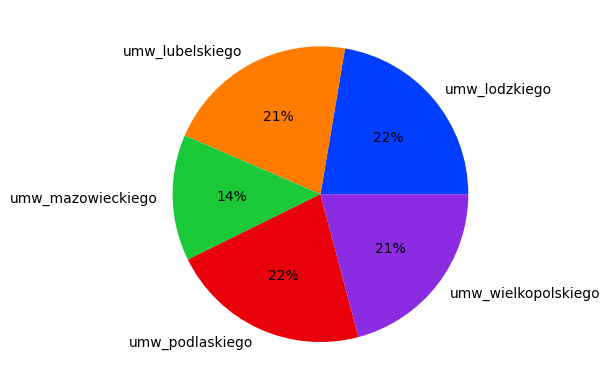

In [8]:
keys = df.umw.unique()
data = [len(df[df.umw == key]) for key in keys]

palette_color = sns.color_palette('bright')

plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')

plt.show()

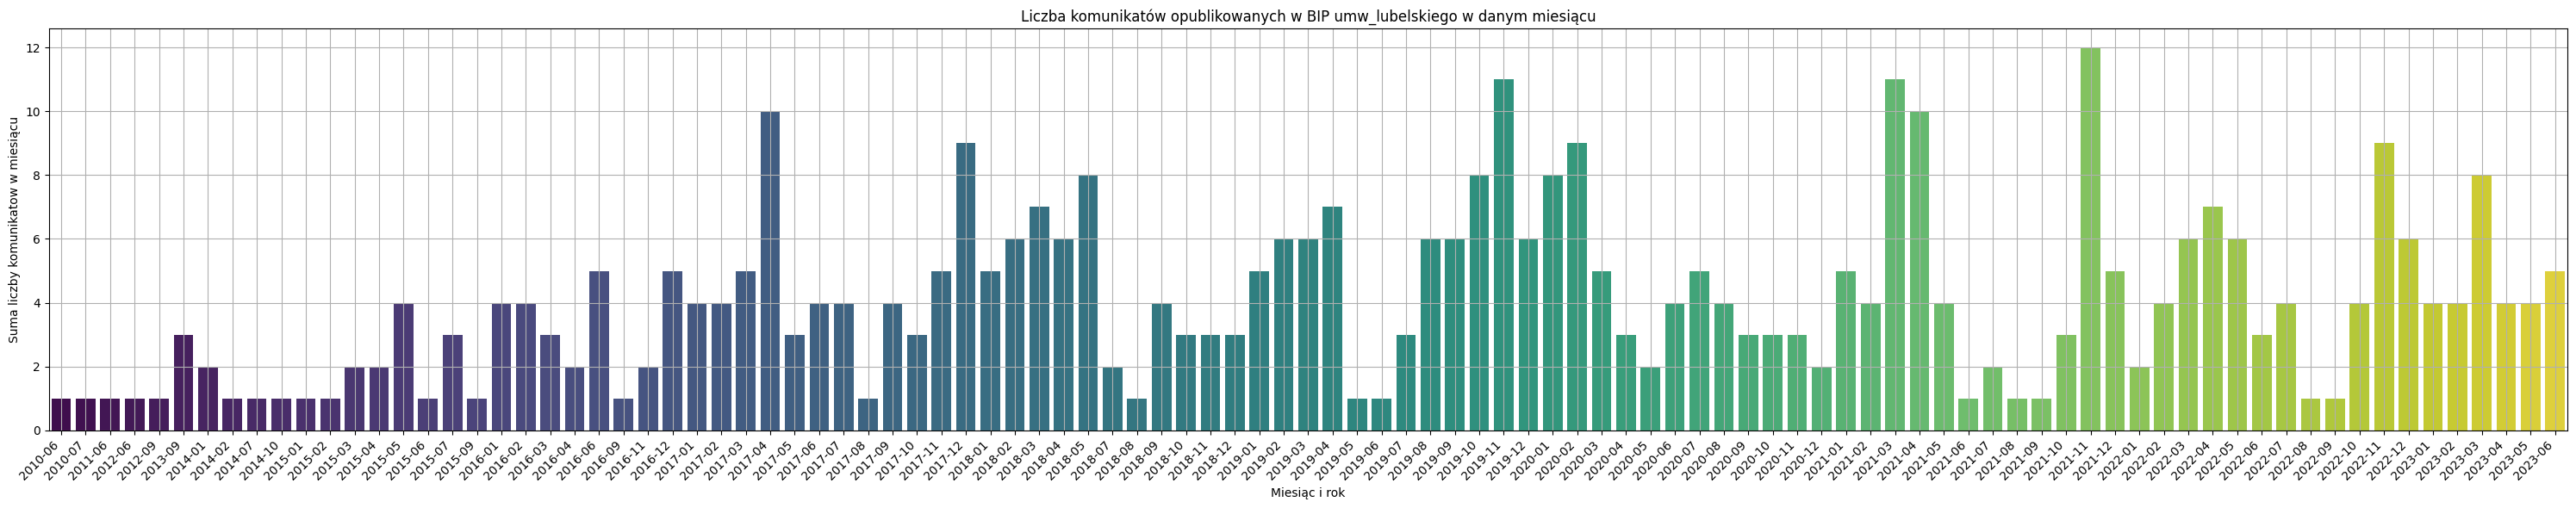

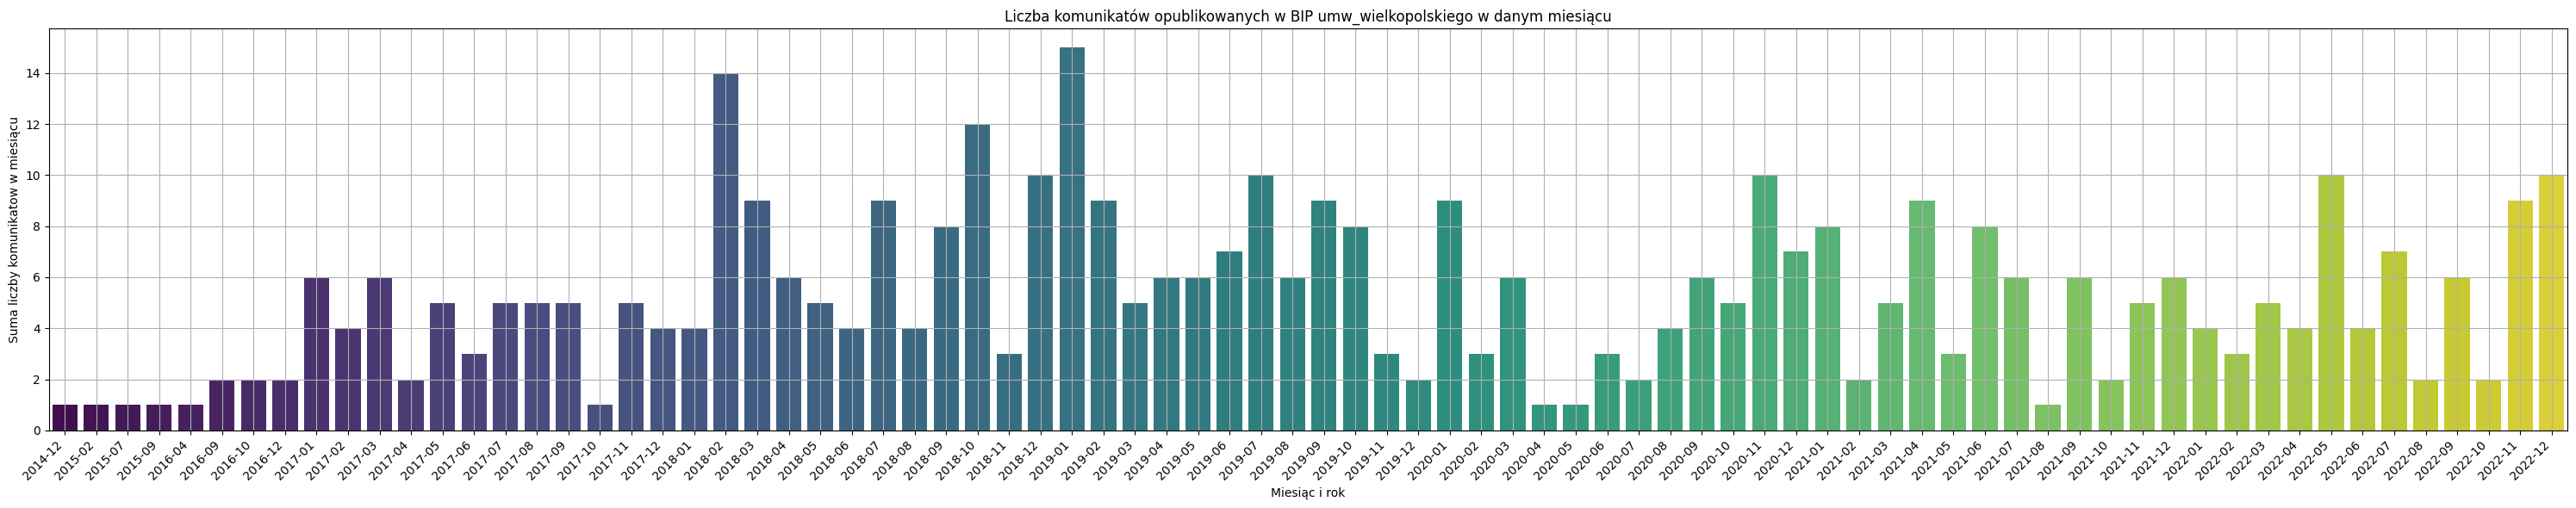

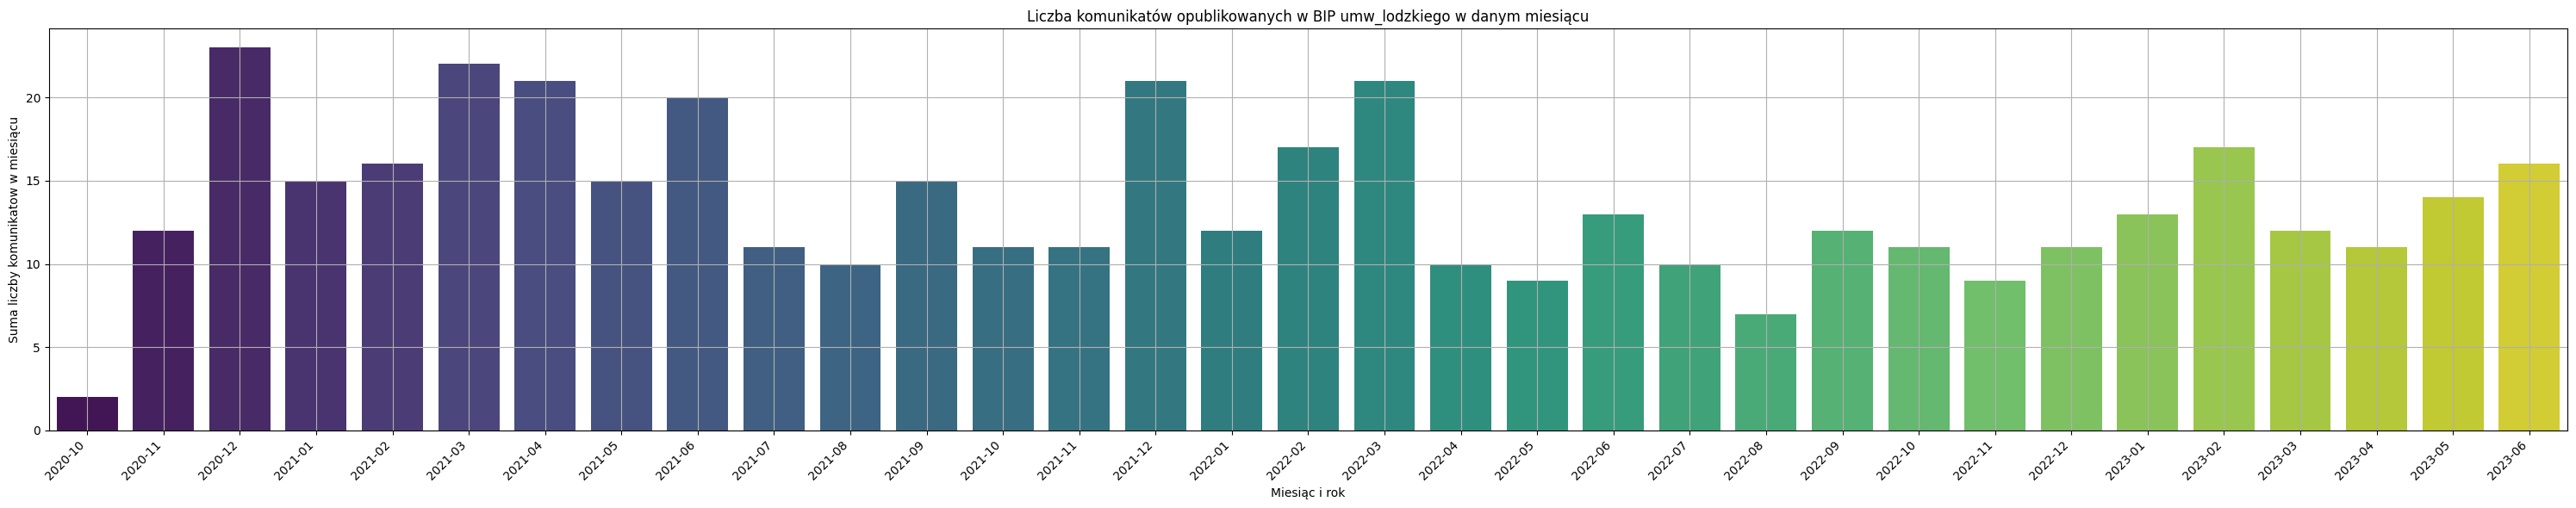

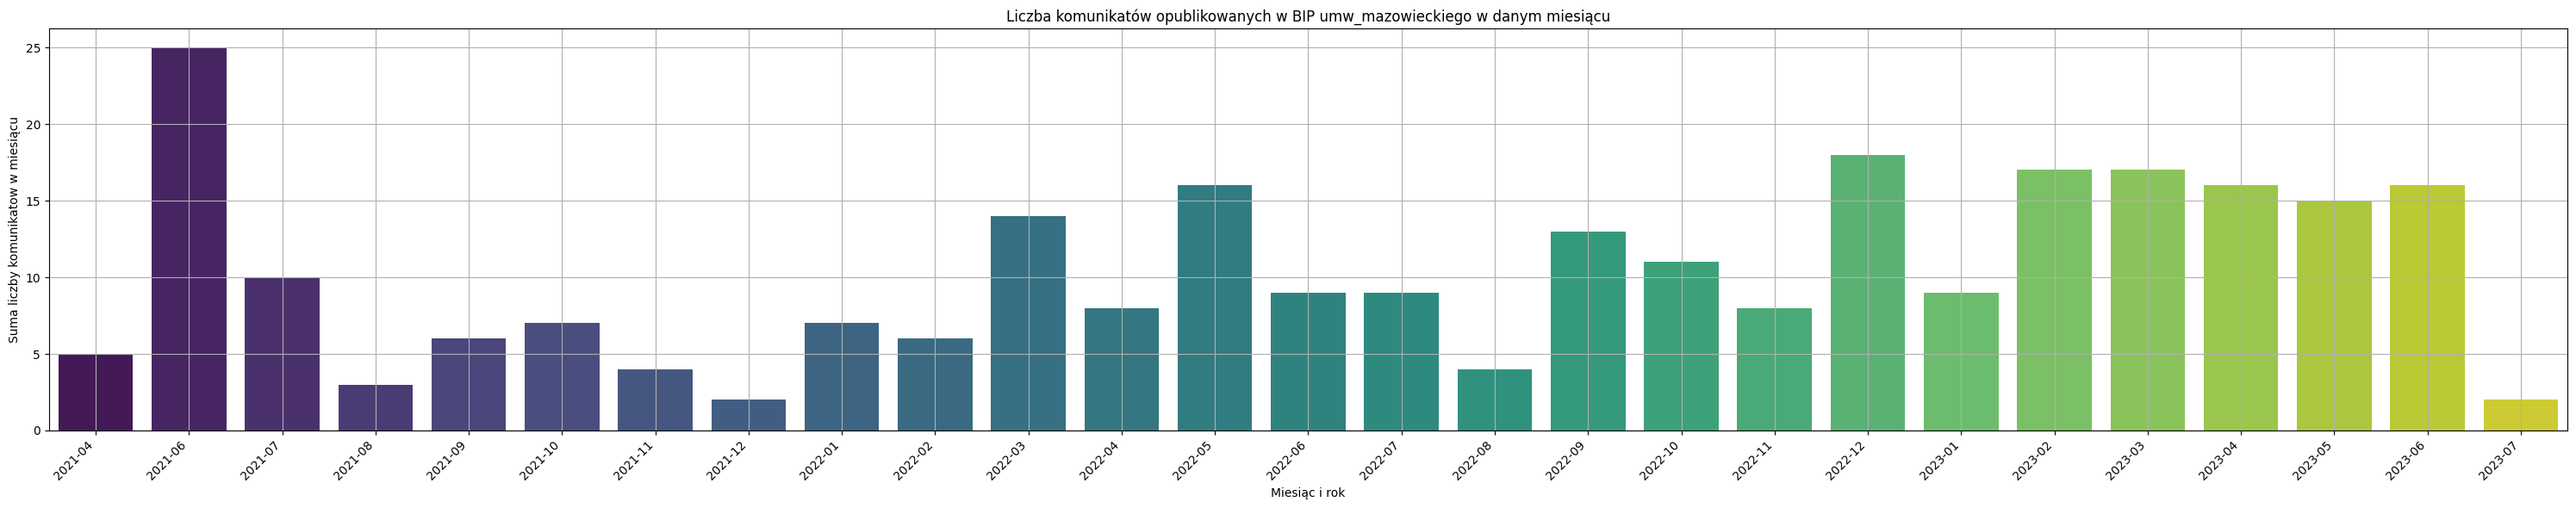

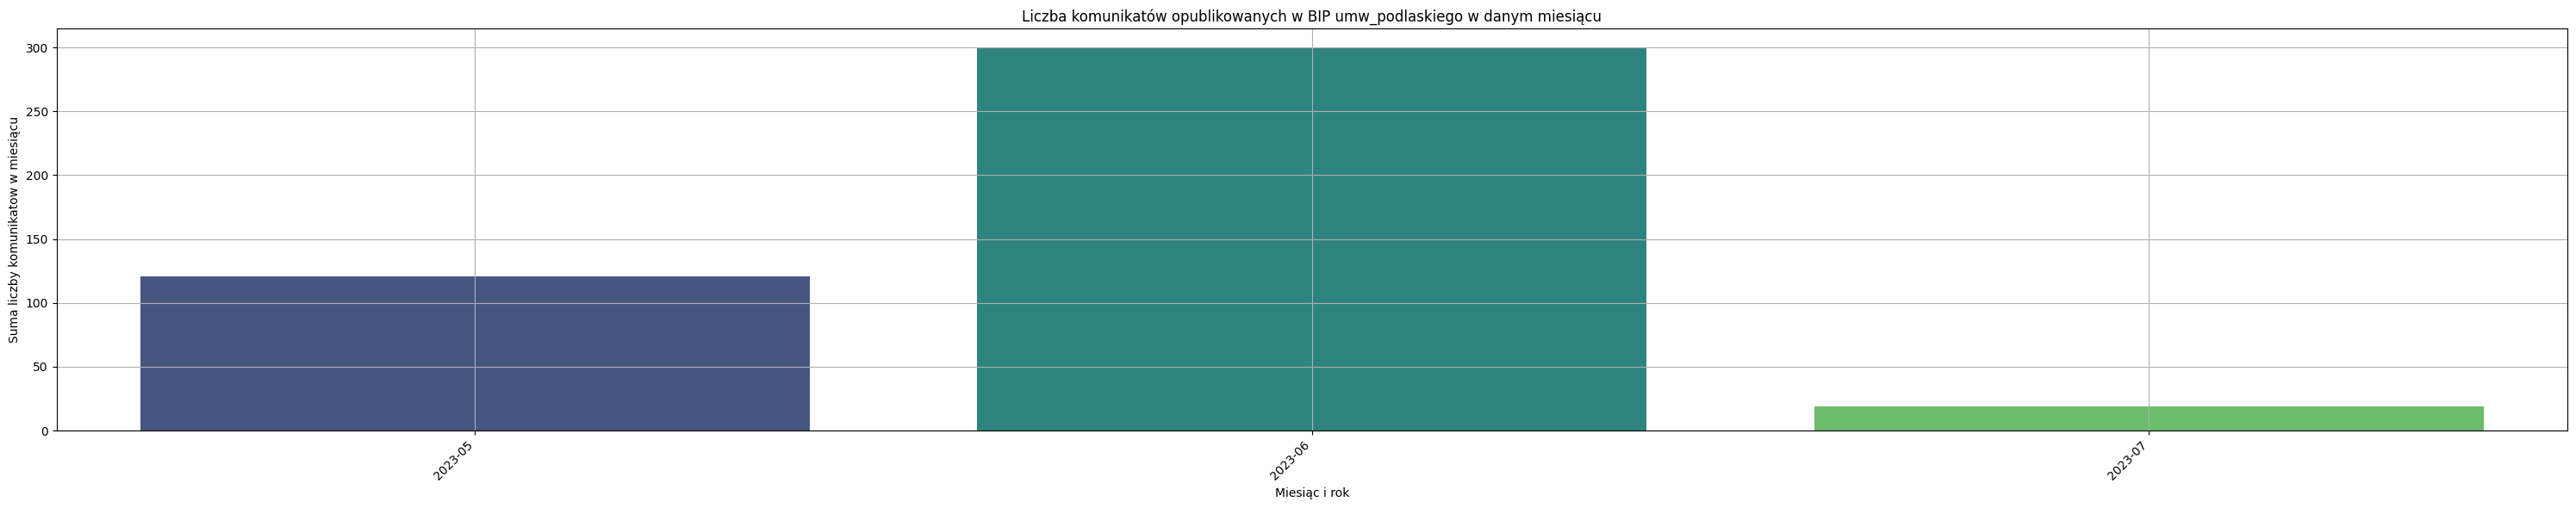

In [9]:
nazwy_umw = suma_dla_miesiaca_i_roku.umw.unique().tolist()

for i in nazwy_umw:
    gen_column_plot(i)